## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# adding zero to show the rows only
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# it will give us the total number
df.query('group == "treatment" and landing_page != "new_page"').count()+df.query('group == "control" and landing_page != "old_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

the total number of times the new_page and treatment don't match is 3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

looks we don't have any missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# removing rows where doese not match right
df2 = df.drop(df[((df.group == 'treatment') & (df.landing_page != 'new_page'))
                 | ((df.landing_page == 'new_page') & (df.group != 'treatment'))].index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.user_id.duplicated().sum()

1

In [12]:
# showing the user id repeated
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(index=2893, inplace=True)

In [15]:
# making sure it's been removed
df2[df2['user_id'].duplicated()].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# query the converted column where group column value is control and take mean
df2.query('group == "control"').mean()

user_id      788164.072594
converted         0.120386
dtype: float64

the probability is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# query the converted column where group column value is treatment and take mean
df2.query('group == "treatment"').mean()

user_id      787845.719290
converted         0.118808
dtype: float64

the probability is 0.118808

d. What is the probability that an individual received the new page?

In [23]:
df2[df2.landing_page == 'new_page'].count()/len(df2)

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**
it looks like the probability of conversion from control group 0.120386 and the treatment group 0.118808 is almost close and similar.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**H0:** p_old is >= p_new <br><br>
**H1:** p_old < p_new

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [17]:
p_new= df2.converted.mean() 
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [18]:
p_old=df2.converted.mean() 
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [19]:
n_new=df2[df2.group == 'treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [20]:
n_old=df2[df2.group == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [21]:
#simulating n_new transaction that have probabiliy of receiving new page
# it will give me different results every time i run
new_page_converted=np.random.choice([1, 0], size=n_new, p=[p_new, (1-(p_new))])
new_page_converted.mean()

0.12118918174936343

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [22]:
# the same from part (e) but for n_old
old_page_converted=np.random.choice([1, 0], size=n_new, p=[p_old, (1-(p_old))])
old_page_converted.mean()

0.11930355791067374

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
new_page_converted.mean() - old_page_converted.mean()

0.0018856238386896901

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above. Store all 10,000 values in **p_diffs.**

In [25]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i choose to use for loop, but we also can use numpy because it is faster.

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
#convert p_diffs to numpy array
p_diffs = np.asarray(p_diffs)

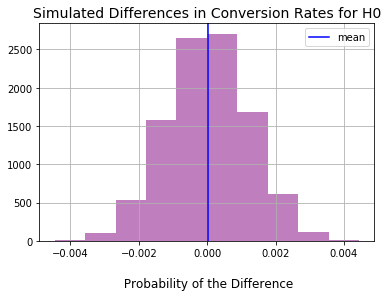

In [27]:
plt.hist(p_diffs, color='purple', alpha=0.5)
plt.grid()
plt.title("Simulated Differences in Conversion Rates for H0", fontsize=14)
plt.xlabel("\n Probability of the Difference", fontsize=12)
plt.axvline(p_diffs.mean(), color='b', label='mean')
plt.legend();

as we can observe that the mean is nearly or kinda equal to zero

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
ab_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
#finding the p-value
(ab_diff < p_diffs).mean()

0.90920000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

**Answer:**

- what we've computed in part j and what it called in scientific studies is **p-value**.

- the p-value we computed is 0.90 and it's greater than the alpha value 0.05 in scientific studies. so we confidently fail to reject H0 or the null hyothesis, and there is no sufficien evidence to say that there is a difference between the two values.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [16]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
#based on statsmodels website
stat, pval =sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
#formating the decimal numbers
print('{0:0.3f}'.format(stat),'{0:0.3f}'.format(pval))

1.311 0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

**answer:**

Z-score is measured in terms of standard deviations from the mean. while our computed z-score equal 1.311 and the p-value is 0.905 which is very close to the previous p-value we've computed in part j and both was greater than alpha 0.05 so we fail to reject H0.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

**Answer:**

since  we want to predict binary outcomes and it has categorical response, we will use **Logistic Regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2.describe()

,user_id,converted
count,290584.000000,290584.000000
mean,788004.876222,0.119597
std,91224.735468,0.324490
min,630000.000000,0.000000
25%,709034.750000,0.000000
50%,787995.500000,0.000000
75%,866956.250000,0.000000
max,945999.000000,1.000000


In [17]:
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [18]:
df2['intercept']=1
log_r= sm.Logit(df2['converted'],df2[['intercept','treatment']])
result= log_r.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [19]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-23 09:40 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

the p-value is 0.1899, even if it's two tailed it's greater than the alpha 0.05. so we fail to Reject the null hypothesis.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**

 p-value associated with ab_page is 0.1899, the differ is the value we found in the II part was one-sided test and in part III it become two-sided test because we added the intercept.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

it's good to study the other factors and add it into our regression model, the only thing remaindes is the timestamp. that might influnce us to consider if the indivisual convert depend on the timestamp. the disadvantages maybe sometimes it will be harder to model or deal with.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [20]:
df2_countries = pd.read_csv('countries.csv')
df2_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [21]:
df2_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [22]:
# merge the two datasets
df3= pd.merge(df2,df2_countries,how='inner',on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [23]:
# creating dummies variables
# we will focus on UK and US
df3['intercept']= 1
df3[['US','UK']] = pd.get_dummies(df3['country'])[['US','UK']]

In [24]:
df3.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,1,0


we got the columns with the dummies variables that will help us in our modle.

In [25]:
lr=sm.Logit(df3['converted'], df3[['intercept','US','UK']])
result=lr.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-23 09:41 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [26]:
# chicking the interactions
df3['US_page'] = df3['US'] * df3['treatment']
df3['UK_page'] = df3['UK'] * df3['treatment']
df3.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,country,US,UK,US_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,1,0,0,0


In [27]:
df3['intercept']= 1
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'treatment', 'US', 'UK','US_page', 'UK_page']])
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-23 09:41 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
treatment     -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

As shown, the p-value of the both countries with thier interactons is greater than the alpha 0.05 level. so we fail to reject the null hypothesis and there is no significant contribution from country to differences in conversion rates for the old and the new pages.

<a id='conclusions'></a>
## Finishing Up


## Conclusions

> **part I**
- in probability part we  found the probability that an individual received the new page is 0.500062 wich is there's almost same chance from receiving the old page.

> **part II**
- we set up our hypothesis to see which page has better result.
- we compute the p-value and it was larger than the alpha value 0.05 so we fail to reject the null hypthesis. and we computed the z-score and p-value which confirmed our first result and fail to reject null hypothesis again.

> **part III**
- because there were two possible outcomes and it was catagorical type. we used logistic regression model.
- we did some calculation and the p-value was 0.1899. we test it in one-side and tow-sided. we faild to reject the nullin both.
- we merge the countries data to study the case with timestamp factor and it gives us similar results of what we've done earlier.

## Resources

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html



In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0